In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML minor Project 3rd Year/Datasets/train.csv')
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


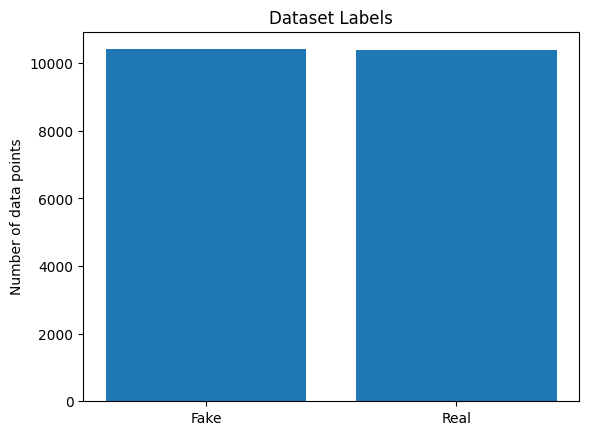

1    10413
0    10387
Name: label, dtype: int64


In [ ]:
from matplotlib import pyplot as plt

xs = [i for i in range(0,2)]

plt.bar(xs, train_data.label.value_counts())
plt.ylabel('Number of data points')
plt.title('Dataset Labels')
plt.xticks([0.0, 1.0], ['Fake', 'Real'])
plt.show()

print(train_data.label.value_counts())

# Explore Data 

In [ ]:
df = train_data
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

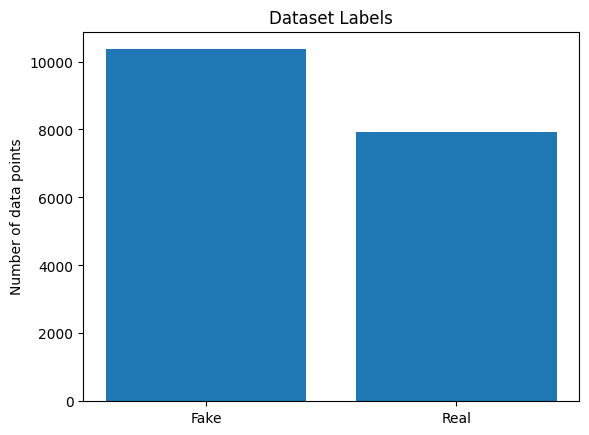

0    10361
1     7924
Name: label, dtype: int64


In [ ]:
from matplotlib import pyplot as plt
xs = [i for i in range(0,2)]

plt.bar(xs, df.label.value_counts())
plt.ylabel('Number of data points')
plt.title('Dataset Labels')
plt.xticks([0.0, 1.0], ['Fake', 'Real'])
plt.show()

print(df.label.value_counts())

In [ ]:
# Most frequent words counter 

import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

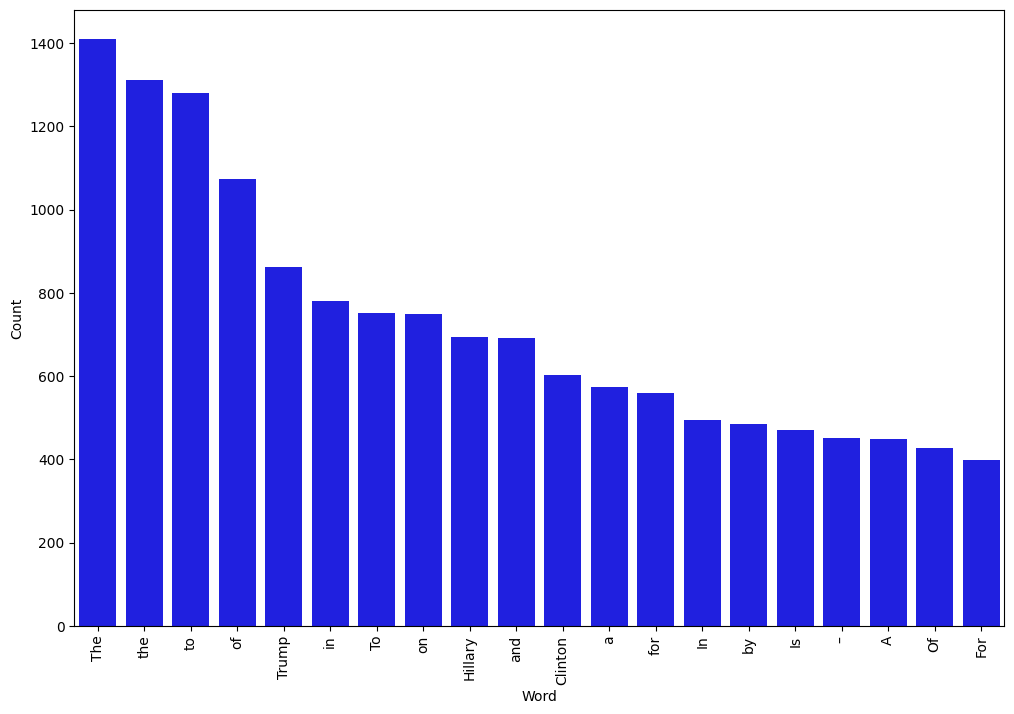

In [ ]:
# Most frequent words in real news

counter(df[df["label"] == 1], "title", 20)

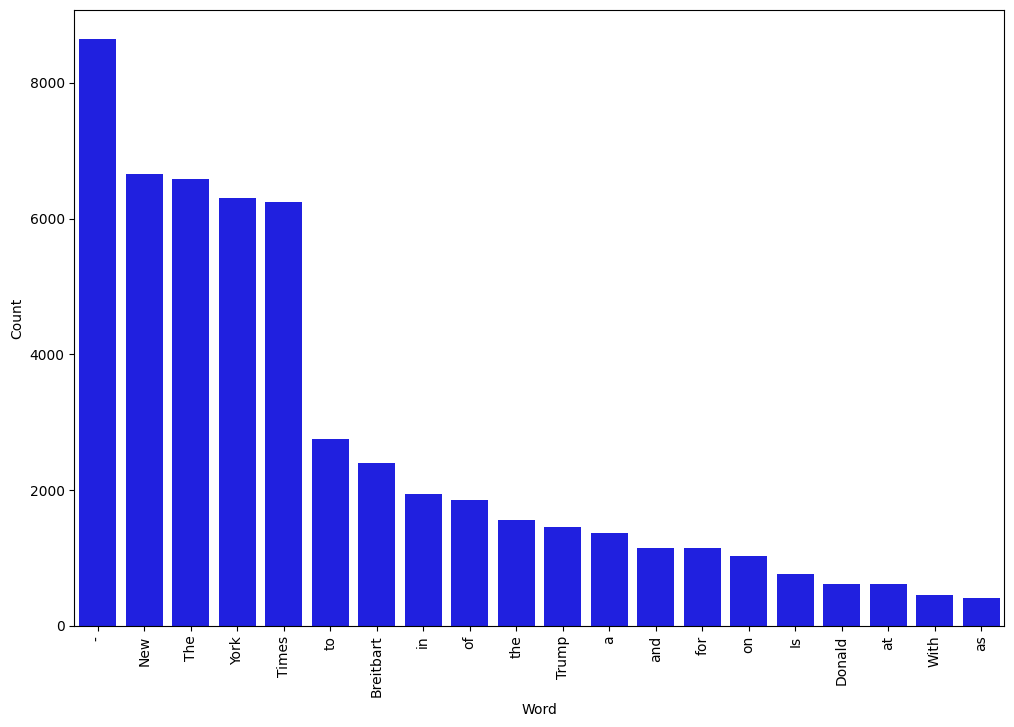

In [ ]:
# Most frequent words in fake news

counter(df[df["label"] == 0], "title", 20)


# Preprocessing

In [ ]:
df = df.drop('author', axis=1)

df.head()

,id,title,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
# Convert to lowercase

df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,id,title,text,label
0,0,house dem aide: we didn’t even see comey’s let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"flynn: hillary clinton, big woman on campus - ...",Ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 civilians killed in single us airstrike hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['title'] = df['title'].apply(punctuation_removal)
df.head()

,id,title,text,label
0,0,house dem aide we didn’t even see comey’s lett...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,flynn hillary clinton big woman on campus bre...,Ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 civilians killed in single us airstrike hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
nltk.download('stopwords')

def preProcess(news_title):
       corpus = []
       for i in range(0, len(news_title)):
              review = re.sub('[^a-zA-Z]', ' ', news_title[i])
              review = review.lower()
              review = review.split()

              review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
              review = ' '.join(review)
              corpus.append(review)
       return corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['title'] = preProcess(list(df['title']))
df.head()

,id,title,text,label
0,0,hous dem aid even see comey letter jason chaff...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,flynn hillari clinton big woman campu breitbart,Ever get the feeling your life circles the rou...,0
2,2,truth might get fire,"Why the Truth Might Get You Fired October 29, ...",1
3,3,civilian kill singl us airstrik identifi,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,iranian woman jail fiction unpublish stori wom...,Print \nAn Iranian woman has been sentenced to...,1


#BERT

In [ ]:
!pip install TextFeatureSelection[0.2.9]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import logging
# Evaluate the model
import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from TextFeatureSelection import TextFeatureSelection, TextFeatureSelectionGA

In [ ]:
data = pd.DataFrame(columns=['title', 'label'], data=df[['title', 'label']].values)

In [ ]:
# from TextFeatureSelection import TextFeatureSelectionGA
# #Input documents: doc_list
# #Input labels: label_list
# getGAobj=TextFeatureSelectionGA(percentage_of_token=80)
# result_df=getGAobj.getGeneticFeatures(doc_list=data['title'],label_list=data['label'])
# print(result_df)

In [ ]:
# Generation: 0 best score 0.9161251550442711
# Generation: 1 best score 0.9155500890637998
# Generation: 2 best score 0.9164878305809893
# Generation: 3 best score 0.9148505768884231
# Generation: 4 best score 0.916996533289938
# Generation: 5 best score 0.9166408437971926
# Generation: 6 best score 0.9166600949438566
# Generation: 7 best score 0.9153462209217311
# Generation: 8 best score 0.9141227539495571
# Generation: 9 best score 0.9137902845950527
# Generation: 10 best score 0.9137838742065136
# Generation: 11 best score 0.9147128901115064
# Generation: 12 best score 0.9142854821625723
# Generation: 13 best score 0.9143749597377571
# Generation: 14 best score 0.9150981599785979
# Generation: 15 best score 0.915009769827974
# Generation: 16 best score 0.9157358209791921
# Generation: 17 best score 0.9148873539151607
# Generation: 18 best score 0.917075389850765
# Generation: 19 best score 0.9146740708506963
# Run time exceeded allocated time. Producing best features generated so far:
# Best metric: 0.917075389850765

result_df={"word_list":['hous', 'dem', 'even', 'letter', 'chaffetz', 'flynn', 'hillari', 'clinton', 'breitbart', 'might', 'civilian', 'us', 'airstrik', 'iranian', 'jail', 'stori', 'hollywood', 'north', 'korea', 'lack', 'tran', 'bathroom', 'exclus', 'video', 'hamon', 'win', 'socialist', 'parti', 'presidenti', 'nomin', 'york', 'ukrain', 'russia', 'courtesi', 'associ', 'obama', 'organ', 'soroslink', 'disrupt', 'agenda', 'bbc', 'housew', 'isi', 'outrag', 'discov', 'secret', 'base', 'treasur', 'hunter', 'photo', 'paid', 'govern', 'troll', 'social', 'media', 'leagu', 'find', 'success', 'abruptli', 'step', 'pay', 'million', 'everyon', 'arrest', 'fbi', 'buzzfe', 'donald', 'polit', 'monica', 'american', 'mental', 'abort', 'pill', 'rise', 'histor', 'treati', 'nuclear', 'islam', 'support', 'vow', 'manchest', 'terrorist', 'tri', 'caught', 'min', 'andrea', 'fox', 'claim', 'retali', 'complaint', 'becam', 'publish', 'fake', 'bori', 'johnson', 'brexit', 'leader', 'texa', 'left', 'behind', 'deal', 'monsanto', 'trend', 'rais', 'worri', 'farmer', 'extremist', 'still', 'danger', 'januari', 'th', 'thread', 'gutierrez', 'chicago', 'violenc', 'bad', 'detail', 'babi', 'best', 'dairi', 'ryan', 'locht', 'conserv', 'divis', 'inquiri', 'roger', 'tv', 'duff', 'presid', 'unveil', 'smartphon', 'referendum', 'migrant', 'quota', 'eu', 'pressur', 'heard', 'inner', 'revolut', 'half', 'crash', 'distract', 'cell', 'individu', 'collect', 'black', 'church', 'laura', 'restor', 'balanc', 'cognit', 'biggest', 'histori', 'way', 'bing', 'impact', 'corpor', 'overhaul', 'day', 'maker', 'world', 'award', 'prize', 'antitrump', 'protest', 'union', 'squar', 'nyc', 'live', 'bring', 'tear', 'googl', 'chemic', 'attack', 'forc', 'juri', 'standoff', 'defend', 'guilti', 'feder', 'conspiraci', 'reportedli', 'penc', 'speak', 'berni', 'make', 'wast', 'report', 'dress', 'mean', 'lead', 'orlean', 'asia', 'tread', 'lightli', 'percent', 'judg', 'diplomat', 'strike', 'syria', 'franken', 'call', 'investig', 'putin', 'crush', 'bile', 'race', 'threaten', 'passag', 'europ', 'huma', 'weiner', 'colin', 'youth', 'camp', 'wow', 'immigr', 'explain', 'mari', 'tyler', 'moor', 'mourn', 'dick', 'poison', 'across', 'help', 'cover', 'pack', 'podcast', 'tip', 'small', 'collaps', 'timelin', 'last', 'econom', 'cycl', 'venezuela', 'muzzl', 'legislatur', 'closer', 'whether', 'john', 'mccain', 'run', 'war', 'candid', 'boom', 'transfer', 'leav', 'confront', 'judgment', 'old', 'deport', 'mit', 'nyu', 'control', 'internet', 'ga', 'chest', 'doubl', 'catch', 'contact', 'illustr', 'struggl', 'washington', 'refuge', 'keep', 'bill', 'espn', 'subscrib', 'loss', 'drag', 'megyn', 'kelli', 'next', 'teacher', 'suspend', 'student', 'cinco', 'de', 'mayo', 'break', 'express', 'concern', 'anthoni', 'illeg', 'month', 'truthfe', 'share', 'debut', 'dinner', 'top', 'doj', 'one', 'first', 'mlb', 'season', 'seek', 'four', 'bird', 'lemonad', 'strife', 'ask', 'increas', 'smoke', 'chapo', 'trap', 'leftw', 'carrier', 'octob', 'card', 'explos', 'riot', 'telescop', 'ate', 'astronomi', 'surpass', 'border', 'arriv', 'pelosi', 'dishonor', 'beauti', 'famili', 'law', 'happen', 'gymnast', 'liter', 'hurt', 'libertarian', 'secretari', 'complain', 'reject', 'global', 'bollywood', 'meant', 'sway', 'hilari', 'fail', 'proven', 'alien', 'stay', 'great', 'hahaha', 'spread', 'worldwid', 'injur', 'jerusalem', 'truckram', 'salut', 'comrad', 'brutal', 'play', 'colleg', 'got', 'kkk', 'david', 'despit', 'fear', 'drain', 'cultur', 'hold', 'interest', 'rate', 'battl', 'unesco', 'latest', 'test', 'roll', 'servic', 'assassin', 'haiti', 'troubl', 'visit', 'fluorid', 'hypothyroid', 'gain', 'sear', 'stanley', 'amp', 'takata', 'execut', 'resign', 'goodby', 'geisha', 'bust', 'robberi', 'anoth', 'replac', 'nobodi', 'examin', 'thousand', 'moon', 'brown', 'decad', 'nice', 'skip', 'convent', 'told', 'comment', 'power', 'quietli', 'libyan', 'girl', 'geniu', 'scientist', 'may', 'advanc', 'usrussia', 'cooper', 'cancer', 'carcinogen', 'glyphos', 'document', 'minut', 'steve', 'harvey', 'presidentelect', 'troop', 'mosul', 'citizen', 'hero', 'luxuri', 'demand', 'mr', 'wild', 'director', 'bamboozl', 'congress', 'natur', 'arteri', 'prevent', 'heart', 'solut', 'cop', 'team', 'miami', 'tame', 'street', 'drink', 'doctor', 'mysteri', 'found', 'summit', 'cure', 'slain', 'brian', 'terri', 'holder', 'among', 'crimin', 'wall', 'commission', 'cleveland', 'logo', 'advisor', 'art', 'paul', 'pokemon', 'inadvert', 'stop', 'suicid', 'welcom', 'preced', 'envoy', 'deni', 'extens', 'python', 'clue', 'blind', 'mystic', 'predict', 'total', 'realiti', 'nsa', 'somalia', 'escal', 'care', 'bless', 'counti', 'challeng', 'intent', 'absurd', 'faa', 'flight', 'harrison', 'key', 'cite', 'strengthen', 'economi', 'es', 'need', 'drone', 'taliban', 'alqaeda', 'revers', 'nbc', 'local', 'think', 'dr', 'mark', 'collett', 'cnn', 'ceo', 'jersey', 'vision', 'showdown', 'loom', 'design', 'harder', 'tack', 'pew', 'trust', 'former', 'plead', 'hand', 'applaud', 'march', 'prepar', 'hay', 'que', 'uncomfort', 'patriot', 'withdraw', 'record', 'strang', 'abedin', 'immun', 'friend', 'boe', 'float', 'oliv', 'branch', 'wapo', 'elizabeth', 'warren', 'milo', 'violent', 'bu', 'life', 'africanamerican', 'museum', 'father', 'bomber', 'libya', 'disrespect', 'bed', 'pac', 'flip', 'elector', 'block', 'sharpton', 'appeal', 'mani', 'doom', 'band', 'architect', 'republ', 'audio', 'justic', 'protect', 'carolina', 'reel', 'hurrican', 'matthew', 'submit', 'achiev', 'requir', 'train', 'germani', 'credit', 'side', 'air', 'connecticut', 'registr', 'lot', 'justin', 'henrik', 'golf', 'gold', 'water', 'mta', 'horror', 'berkeley', 'statist', 'propaganda', 'selfhelp', 'guru', 'religi', 'liberti', 'era', 'sad', 'rebel', 'without', 'court', 'recount', 'feud', 'explan', 'east', 'appli', 'full', 'long', 'suspect', 'radic', 'store', 'market', 'readi', 'neil', 'suprem', 'bidder', 'project', 'stake', 'approv', 'addit', 'bank', 'abbott', 'sanctuari', 'cincinnati', 'defens', 'lawmak', 'push', 'constitut', 'let', 'franci', 'celebr', 'jeff', 'podesta', 'swamp', 'economist', 'frase', 'wont', 'lazi', 'liber', 'bannon', 'australia', 'detent', 'center', 'accept', 'asylum', 'politico', 'ador', 'sound', 'face', 'castil', 'wayn', 'novemb', 'contrarian', 'flashback', 'rep', 'iran', 'hama', 'lesseroftwoevil', 'advis', 'william', 'prevail', 'soul', 'perform', 'tough', 'billionair', 'hotel', 'taken', 'easi', 'ann', 'coulter', 'unload', 'pro', 'silver', 'skyrocket', 'chaotic', 'shift', 'ghost', 'huffington', 'sleep', 'ship', 'sonoma', 'creat', 'largest', 'gmo', 'wikileak', 'porn', 'clare', 'name', 'givenchi', 'shame', 'draft', 'prospect', 'murder', 'atlant', 'confid', 'handl', 'gambia', 'south', 'africa', 'burundi', 'exodu', 'uniti', 'birth', 'use', 'frozen', 'assang', 'puppet', 'god', 'word', 'stock', 'gone', 'kerri', 'coup', 'stephen', 'miller', 'absolut', 'sovereign', 'determin', 'cannot', 'enter', 'languag', 'twitter', 'critic', 'warrior', 'cruis', 'cavali', 'refus', 'refuel', 'pool', 'patient', 'stand', 'rock', 'dapl', 'pulitz', 'takeov', 'attend', 'specul', 'possibl', 'pardon', 'mash', 'damn', 'brew', 'swede', 'irish', 'window', 'ramadan', 'failur', 'lewandowski', 'liar', 'chairman', 'occult', 'cook', 'abramovi', 'pregnanc', 'loan', 'red', 'cross', 'energet', 'poop', 'pant', 'thursday', 'born', 'scene', 'depth', 'cancel', 'rodrigo', 'philippin', 'regret', 'plain', 'disput', 'search', 'engin', 'employ', 'meme', 'nchez', 'undermin', 'saker', 'commun', 'measur', 'lander', 'betsi', 'begin', 'choic', 'morri', 'unten', 'denial', 'palestin', 'divid', 'blast', 'ruin', 'establish', 'etc', 'britain', 'reduc', 'sever', 'alon', 'short', 'fighter', 'yet', 'fals', 'eastern', 'prophet', 'muhammad', 'upon', 'rescu', 'core', 'baylor', 'footbal', 'airport', 'sinatra', 'advic', 'sharon', 'laureat', 'sexual', 'scrutin', 'collar', 'rubber', 'suppos', 'griffin', 'antic', 'label', 'summer', 'catastroph', 'inform', 'provok', 'cloud', 'blasio', 'manag', 'bobbi', 'amnesti', 'proamerican', 'creamer', 'michel', 'kid', 'slide', 'capit', 'mood', 'focu', 'bankrupt', 'puerto', 'rico', 'statehood', 'overwhelm', 'basic', 'seattl', 'molest', 'gender', 'runway', 'nato', 'pest', 'bear', 'pie', 'littl', 'danc', 'oz', 'wrestler', 'engag', 'deadli', 'buck', 'enemi', 'afghan', 'content', 'risk', 'ceil', 'swing', 'margaret', 'maryland', 'drown', 'outsid', 'yike', 'receiv', 'warfight', 'unit', 'endors', 'accord', 'woodward', 'apolog', 'traci', 'morgan', 'emot', 'saturday', 'congressman', 'budget', 'primer', 'president', 'estado', 'loretta', 'lynch', 'fifth', 'upset', 'british', 'flock', 'rural', 'maduro', 'foe', 'emigr', 'quasileg', 'oper', 'jr', 'suspici', 'arizona', 'tortur', 'sufi', 'shrine', 'clever', 'arrang', 'transform', 'plea', 'moment', 'blackburn', 'greenhous', 'tenant', 'evict', 'gonna', 'stanc', 'toward', 'chill', 'pet', 'miss', 'case', 'hiv', 'koch', 'evacu', 'swedish', 'career', 'vine', 'write', 'newsbiscuit', 'iowa', 'controversi', 'made', 'post', 'guardian', 'opinion', 'onlin', 'bean', 'samantha', 'bee', 'along', 'second', 'avenu', 'subway', 'cher', 'seethrough', 'ice', 'out', 'today', 'san', 'francisco', 'tower', 'rage', 'better', 'direct', 'rick', 'slatteri', 'cost', 'hq', 'invad', 'fulli', 'near', 'sorosback', 'climat', 'celeb', 'mall', 'journey', 'belong', 'cult', 'warden', 'saudita', 'ariel', 'noyola', 'third', 'india', 'said', 'furiou', 'partisan', 'memo', 'wildfir', 'empti', 'fort', 'sand', 'schumer', 'appoint', 'goldman', 'cholesterol', 'martin', 'nearli', 'later', 'georgia', 'savor', 'outlin', 'other', 'throw', 'convict', 'dc', 'sniper', 'sentenc', 'thanksgiv', 'weekend', 'clip', 'decis', 'dan', 'secretli', 'alli', 'expand', 'insur', 'custom', 'davo', 'pel', 'entr', 'congression', 'trophi', 'present', 'paper', 'silk', 'road', 'nixon', 'bull', 'shop', 'bowl', 'bob', 'justifi', 'blackbal', 'marijuana', 'benjamin', 'morn', 'dalian', 'wanda', 'product', 'pm', 'breakdown', 'softwar', 'startup', 'concuss', 'children', 'adult', 'craig', 'frantic', 'dirti', 'rent', 'impeach', 'brazil', 'someth', 'gonzaga', 'beat', 'gorka', 'interventionist', 'number', 'provid', 'iraqi', 'infant', 'loser', 'teenag', 'round', 'keith', 'quit', 'whole', 'univers', 'fellowship', 'diss', 'privileg', 'wear', 'hair', 'appropri', 'beyond', 'quarrel', 'broke', 'ii', 'autism', 'dictatorship', 'uncertain', 'bottom', 'ho', 'punk', 'cano', 'professor', 'pledg', 'resist', 'cdc', 'frankenstein', 'romo', 'instagram', 'farright', 'toddler', 'hot', 'richard', 'nail', 'corrupt', 'counteract', 'trillion', 'debt', 'homeless', 'anyway', 'airbnb', 'fine', 'tech', 'planner', 'evid', 'robot', 'complic', 'legend', 'depress', 'panic', 'prey', 'broadcast', 'gari', 'equat', 'defund', 'antiisrael', 'resolut', 'pioneer', 'blackston', 'fat', 'diseas', 'scheme', 'wood', 'concert', 'reform', 'carter', 'attempt', 'fool', 'mayb', 'buffett', 'appl', 'grown', 'horrifi', 'surfac', 'overnight', 'station', 'hodg', 'fraud', 'ridicul', 'salli', 'stage', 'haunt', 'korean', 'jongun', 'surgeon', 'admit', 'streep', 'antisharia', 'board', 'windi', 'young', 'st', 'birthday', 'mississippi', 'chri', 'list', 'grammi', 'fallout', 'idiot', 'sweat', 'head', 'deputi', 'manur', 'govt', 'twitchycom', 'narrowli', 'obamaera', 'costli', 'area', 'hail', 'heir', 'susan', 'conflict', 'influx', 'kushner', 'soninlaw', 'cocain', 'adnan', 'serial', 'swimmer', 'fuel', 'spar', 'jane', 'pauley', 'deutsch', 'consid', 'altern', 'bonu', 'danni', 'compani', 'overtim', 'european', 'parliament', 'rex', 'whose', 'prompt', 'conduct', 'privat', 'avail', 'reuter', 'earli', 'wilder', 'cranston', 'shine', 'result', 'ag', 'nd', 'nationwid', 'crackdown', 'weari', 'wwn', 'horoscop', 'sneak', 'usmexico', 'rig', 'proxi', 'le', 'manlio', 'dinucci', 'weinerg', 'chain', 'correct', 'mess', 'doctrin', 'launch', 'parenthood', 'import', 'bundi', 'occupi', 'antitrust', 'quot', 'gretchen', 'carlson', 'mislead', 'lastsecond', 'lane', 'merger', 'traffic', 'montreal', 'labor', 'wage', 'dhabi', 'tank', 'handler', 'banker', 'seed', 'check', 'charit', 'wed', 'nypd', 'feinstein', 'originalist', 'segreg', 'thought', 'music', 'western', 'magazin', 'tire', 'mcknight', 'shiit', 'limit', 'caucu', 'kidnap', 'spare', 'gunman', 'describ', 'shun', 'garland', 'mobil', 'evolut', 'editori', 'misconduct', 'sit', 'inc', 'cave', 'thug', 'pussi', 'bare', 'psycho', 'plu', 'indiana', 'extend', 'data', 'educ', 'pitt', 'two', 'indoor', 'reilli', 'anymor', 'conced', 'foil', 'traditionalist', 'molotov', 'cocktail', 'oppos', 'advert', 'motion', 'stranger', 'ticket', 'potter', 'curs', 'distribut', 'hispan', 'crowd', 'rubio', 'hunger', 'silenc', 'walter', 'allegedli', 'sister', 'scrap', 'rare', 'fashion', 'craigslist', 'bake', 'soda', 'neighbor', 'phelp', 'gift', 'allianc', 'underway', 'brooklyn', 'prior', 'impos', 'trigger', 'hostag', 'sprott', 'asset', 'client', 'farm', 'tesla', 'musk', 'solarc', 'condemn', 'nemesi', 'thunder', 'motorcyclist', 'bigger', 'sugar', 'ground', 'aircraft', 'yorker', 'psycholog', 'exit', 'cours', 'anthem', 'yanke', 'stadium', 'spin', 'ab', 'wealth', 'term', 'halt', 'dawn', 'kyrgyzstan', 'uzbekistan', 'turmer', 'exclud', 'resourc', 'fda', 'manipul', 'abl', 'fast', 'nervou', 'jerri', 'shi', 'ite', 'commerci', 'naval', 'guid', 'wake', 'fatherson', 'believ', 'often', 'studio', 'captur', 'friendliest', 'male', 'starr', 'speed', 'laugh', 'explod', 'millenni', 'turnout', 'turkish', 'alleg', 'nasti', 'kevin', 'golden', 'defraud', 'swirl', 'falsehood', 'asianamerican', 'visibl', 'feel', 'nomine', 'assur', 'disgrac', 'hire', 'hernandez', 'minist', 'backlash', 'authent', 'financ', 'imped', 'wilson', 'punish', 'meteor', 'implic', 'laidoff', 'zip', 'bolder', 'semifin', 'owe', 'trooper', 'deaf', 'sarah', 'rinocar', 'fix', 'antisemit', 'mcconnel', 'uh', 'flaw', 'revel', 'ton', 'australian', 'rift', 'widen', 'religion', 'coach', 'updat', 'nationalist', 'system', 'conceal', 'combat', 'decadesold', 'chariti', 'cnbc', 'wtf', 'kellyann', 'conway', 'watson', 'annual', 'decreas', 'patholog', 'yesterday', 'jose', 'fleet', 'jeremi', 'draw', 'debbi', 'menon', 'factori', 'purpos', 'premier', 'shepherd', 'wane', 'cool', 'wolf', 'spider', 'turmoil', 'rio', 'dig', 'chef', 'antigay', 'forgotten', 'recal', 'magic', 'bicker', 'biden', 'obes', 'surrog', 'schoen', 'naacp', 'kissing', 'around', 'pilot', 'sure', 'cheat', 'navig', 'analyst', 'lament', 'joanna', 'redneck', 'lethal', 'nofli', 'puzzl', 'czech', 'observ', 'greek', 'rand', 'treasuri', 'polar', 'explor', 'stevor', 'hat', 'nacht', 'pat', 'spi', 'jongnam', 'ancient', 'spiritu', 'root', 'russophobia', 'disappoint', 'parad', 'unleash', 'uproar', 'playlist', 'slip', 'void', 'factcheck', 'baltimor', 'uneas', 'playoff', 'matchup', 'virgil', 'exist', 'routin', 'feet', 'opioid', 'fcking', 'ballist', 'aclu', 'figur', 'infect', 'remedi', 'mad', 'maralago', 'caitlyn', 'jenner', 'austria', 'frontier', 'oligarch', 'acknowledg', 'calm', 'starbuck', 'norm', 'macdonald', 'funni', 'deficit', 'fall', 'highlight', 'eaten', 'boost', 'built', 'fece', 'sandwich', 'portrait', 'rein', 'petit', 'address', 'whitelist', 'abbi', 'taylor', 'bomsbhel', 'fixer', 'wive', 'ymca', 'remov', 'lemon', 'stomach', 'electr', 'grid', 'rd', 'brilliant', 'lee', 'proof', 'roar', 'perri', 'introduc', 'ceasefir', 'tim', 'kain', 'oust', 'redefin', 'domin', 'stagger', 'assist', 'princip', 'sky', 'cultiv', 'guess', 'ireland', 'reconsid', 'experi', 'audienc', 'solitari', 'notabl', 'basel', 'hall', 'bet', 'collus', 'pen', 'bipolar', 'pride', 'ny', 'hoax', 'matteo', 'auto', 'boat', 'css', 'adam', 'medic', 'gateway', 'suddenli', 'option', 'navi', 'fewer', 'hypocrit', 'marvel', 'comic', 'imax', 'theater', 'vietnam', 'overshadow', 'due', 'menendez', 'clich', 'dilbert', 'creator', 'missouri', 'gef', 'interf', 'fs', 'delet', 'letterman', 'leonard', 'cohen', 'warplan', 'mull', 'ms', 'bestsel', 'televis', 'epidem', 'loneli', 'cage', 'kayla', 'trumprussia', 'connect', 'screen', 'cathol', 'usda', 'either', 'english', 'instruct', 'ouch', 'groom', 'seat', 'rnc', 'crack', 'seller', 'mortgag', 'everywher', 'joli', 'dozen', 'brock', 'freak', 'entir', 'neue', 'ginger', 'tea', 'steadili', 'type', 'driveway', 'weigh', 'grant', 'ploy', 'taxpay', 'welfar', 'apocalyps', 'takeaway', 'away', 'veto', 'hanniti', 'schedul', 'worthi', 'hill', 'dnc', 'fundrais', 'overturn', 'parker', 'imperson', 'freed', 'weil', 'schweizer', 'janet', 'interfer', 'shrug', 'holi', 'nba', 'ponen', 'hegemon', 'lar', 'ebenfal', 'zu', 'object', 'supremacist', 'wwiii', 'miseri', 'dollar', 'grade', 'cockpit', 'scream', 'parol', 'fukushima', 'alcohol', 'buildup', 'gaff', 'carrot', 'hungarian', 'late', 'undocu', 'barbra', 'streisand', 'heartbreak', 'visa', 'scare', 'microsoft', 'federalist', 'safer', 'belgium', 'mum', 'trauma', 'gawker', 'goto', 'sheet', 'rome', 'um', 'whatev', 'snub', 'co', 'baton', 'encount', 'smith', 'delegitim', 'milano', 'bureaucrat', 'oklahoma', 'hub', 'substanti', 'mueller', 'obstruct', 'recommend', 'intel', 'consul', 'idaho', 'seizur', 'form', 'rememb', 'cohn', 'sens', 'gainor', 'regul', 'affili', 'produc', 'blood', 'stem', 'latino', 'repli', 'earn', 'averag', 'self', 'aunti', 'shakeup', 'sidelin', 'profess', 'reserv', 'peak', 'btfo', 'led', 'fabric', 'bret', 'baier', 'jessica', 'divorc', 'daughter', 'dear', 'terribl', 'respect', 'thru', 'titan', 'dh', 'sheep', 'pillow', 'downtown', 'enforc', 'ruffalo', 'harsh', 'kenya', 'yearsold', 'code', 'pink', 'proisrael', 'apartheid', 'billi', 'joel', 'ridg', 'blackhead', 'quickli', 'precis', 'behavior', 'creation', 'westworld', 'crook', 'collud', 'ambassador', 'discoveri', 'fruit', 'friendship', 'argument', 'acquitt', 'spacex', 'paus', 'den', 'newspap', 'nikki', 'eve', 'vinc', 'loui', 'retriev', 'garner', 'verdict', 'slap', 'manhattan', 'devic', 'jone', 'strength', 'payday', 'talent', 'burka', 'nostradamu', 'diego', 'aztec', 'gardasil', 'went', 'socal', 'melanesian', 'speci', 'paranoia', 'berlin', 'directli', 'moma', 'entri', 'capitol', 'pound', 'longer', 'attract', 'dismay', 'begun', 'prescrib', 'btch', 'startl', 'clooney', 'tragic', 'propheci', 'snag', 'thrown', 'adopt', 'rehab', 'addict', 'scum', 'vile', 'implement', 'regist', 'awesom', 'gut', 'fran', 'oi', 'holland', 'butcher', 'ran', 'flint', 'wimbledon', 'inherit', 'whistleblow', 'larri', 'wilmor', 'tap', 'princ', 'heel', 'style', 'guard', 'programm', 'develop', 'roof', 'poster', 'perjuri', 'slash', 'younger', 'blogger', 'licens', 'fugit', 'delingpol', 'archbishop', 'canterburi', 'mario', 'demonetis', 'donna', 'puls', 'afterlif', 'outcom', 'branca', 'bratton', 'neanderth', 'alltim', 'malala', 'judd', 'dream', 'aca', 'sean', 'buddi', 'cowherd', 'deserv', 'alan', 'panda', 'endang', 'russland', 'servant', 'adventur', 'accomplic', 'temporari', 'mandat', 'malik', 'indict', 'hammer', 'tini', 'villag', 'bosanski', 'fold', 'wide', 'slow', 'toll', 'keef', 'sting', 'clearli', 'feloni', 'kasich', 'airbag', 'avert', 'assail', 'ipo', 'maddow', 'sacramento', 'emerg', 'euroscept', 'euro', 'room', 'smell', 'fountain', 'embed', 'maryaha', 'volkswagen', 'arsen', 'kirk', 'duckworth', 'eta', 'disarm', 'forward', 'grandmoth', 'shout', 'scientif', 'pastor', 'yemeni', 'sabot', 'disqualifi', 'ovat', 'purpl', 'flashmob', 'occur', 'grandfath', 'pimp', 'member', 'snowflak', 'pompeo', 'highest', 'bribe', 'touch', 'survivor', 'batter', 'spray', 'altruist', 'rebrand', 'erdogan', 'daesh', 'nutrit', 'jurgen', 'klinsmann', 'ivan', 'reich', 'rioter', 'wsj', 'sicken', 'kindli', 'slay', 'ignit', 'crazi', 'guant', 'namo', 'symphoni', 'resolv', 'seven', 'worldhistor', 'guncontrol', 'ukrainian', 'gap', 'royal', 'buri', 'felon', 'bald', 'technolog', 'alter', 'hollow', 'pan', 'grappl', 'agoni', 'teas', 'neglig', 'holocaust', 'denier', 'priebu', 'age', 'sin', 'circuit', 'oversampl', 'hh', 'august', 'roundup', 'emiss', 'renam', 'denzel', 'magnific', 'mutil', 'beast', 'ana', 'navarro', 'posttrump', 'regim', 'airbas', 'descend', 'borrow', 'mehr', 'vatican', 'spox', 'benedict', 'pepe', 'choke', 'lucif', 'retribut', 'maguir', 'situat', 'poet', 'diverg', 'christ', 'antichrist', 'understand', 'ich', 'gegen', 'arpaio', 'prosecut', 'jo', 'reshap', 'colombia', 'farc', 'plagu', 'wei', 'hau', 'statu', 'skeptic', 'richmond', 'confidenti', 'hood', 'rat', 'carson', 'relianc', 'territori', 'lay', 'aliv', 'reveng', 'chemtrail', 'audit', 'badass', 'shred', 'favorit', 'spokesman', 'soften', 'kneeler', 'pour', 'contain', 'parodi', 'pilger', 'endgam', 'tornado', 'merciless', 'wave', 'inequ', 'calori', 'guilt', 'leaker', 'wine', 'screw', 'soft', 'auschwitz', 'marlin', 'accid', 'adhd', 'usual', 'invoc', 'laughabl', 'austrian', 'enrag', 'compass', 'valentin', 'geograph', 'coincid', 'noncitizen', 'multipl', 'gunshot', 'bone', 'girlfriend', 'anyth', 'ft', 'shooter', 'cpac', 'upsid', 'willi', 'hint', 'overreach', 'instantli', 'lumber', 'tragedi', 'somebodi', 'kept', 'leas', 'unnot', 'sweet', 'granni', 'suppli', 'defect', 'rihanna', 'delta', 'sponsorship', 'stab', 'behead', 'will', 'surveil', 'abd', 'nun', 'gaslight', 'westernback', 'monopoli', 'homeland', 'worldview', 'broadway', 'uniqu', 'abram', 'down', 'here', 'tune', 'abandon', 'tsunami', 'whale', 'sonni', 'roach', 'analyz', 'salad', 'guy', 'steven', 'dose', 'mushroom', 'reverend', 'dankof', 'treatment', 'lure', 'awar', 'staffer', 'strip', 'unlik', 'intimid', 'disproportion', 'slice', 'blatant', 'jazz', 'chist', 'databas', 'bro', 'cameron', 'dish', 'neera', 'tanden', 'correspond', 'remot', 'farag', 'whine', 'extinct', 'intrud', 'batch', 'tsa', 'utah', 'oval', 'actual', 'depict', 'cyberbulli', 'beg', 'mistress', 'debtfre', 'overdos', 'livewir', 'abduct', 'pt', 'mindset', 'penis', 'vagina', 'mma', 'subpoena', 'layoff', 'varieti', 'cartel', 'outlet', 'saw', 'afraid', 'fascism', 'prioriti', 'consortiumnew', 'mile', 'hunt', 'gulf', 'toro', 'greed', 'tarnish', 'capabl', 'termin', 'unpreced', 'bezo', 'exmarin', 'lt', 'gen', 'harold', 'chamber', 'jk', 'fluctuat', 'lisa', 'transcend', 'truce', 'larger', 'automak', 'hazard', 'remark', 'lincoln', 'quo', 'reliabl', 'faction', 'weed', 'killer', 'cabl', 'han', 'stroll', 'madrid', 'wrap', 'charisma', 'proud', 'shoe', 'jeanin', 'score', 'rap', 'shower', 'kitchen', 'unverifi', 'counter', 'bipartisan', 'strongli', 'affirm', 'fcc', 'function', 'sabotag', 'arbitr', 'unemploy', 'realtim', 'nv', 'jeffrey', 'align', 'intuit', 'sitin', 'biopic', 'ambit', 'bullion', 'uranium', 'woe', 'chronicl', 'hondura', 'extraterrestri', 'schoolchildren', 'badli', 'coral', 'reef', 'brotherhood', 'teamamerica', 'betray', 'sprint', 'temporarili', 'promin', 'easier', 'ratio', 'household', 'previou', 'meyssan', 'tournament', 'reaction', 'consensu', 'rachel', 'asteroid', 'bridg', 'msnbc', 'migrat', 'academi', 'ensur', 'toast', 'hundr', 'settler', 'reno', 'equiti', 'fraudul', 'tepid', 'cowork', 'gangrap', 'kmart', 'ami', 'author', 'filmmak', 'conni', 'finger', 'mistrial', 'exoffic', 'omb', 'daytim', 'deadlock', 'rivalri', 'tribut', 'tobi', 'sledgehamm', 'jacob', 'primari', 'pol', 'geert', 'signific', 'reinc', 'mansion', 'insist', 'marriag', 'flipflop', 'preliminari', 'effortless', 'cuba', 'mediterranean', 'distort', 'meat', 'suburb', 'pace', 'bound', 'fullon', 'dement', 'imbecil', 'killari', 'postobama', 'vice', 'tonight', 'horizon', 'skittl', 'hysteria', 'surround', 'hardest', 'intl', 'unlaw', 'academia', 'rapidli', 'lohan', 'accent', 'slave', 'sundanc', 'frustrat', 'convers', 'exceed', 'athlet', 'kurd', 'cyru', 'pitch', 'rough', 'fifa', 'elder', 'fiscal', 'bloodbath', 'fieri', 'higher', 'marathon', 'bashar', 'alassad', 'arab', 'agit', 'pole', 'pipe', 'unconsci', 'bucknel', 'solac', 'worthless', 'endur', 'hater', 'spring', 'calif', 'hottest', 'destin', 'visitor', 'caesar', 'mountain', 'butthurt', 'within', 'percept', 'nestl', 'dramat', 'preacher', 'ministri', 'longterm', 'sampl', 'bottl', 'balk', 'rahm', 'rout', 'ed', 'instat', 'tuition', 'cal', 'satanist', 'bullsht', 'fillon', 'hing', 'sublimin', 'blaze', 'denounc', 'sermon', 'publicli', 'elud', 'hermin', 'soneg', 'mundo', 'tico', 'joy', 'usl', 'warfar', 'jihadi', 'mph', 'progress', 'raheem', 'kassam', 'deadlin', 'cm', 'patienc', 'gamechang', 'phil', 'mickelson', 'firefight', 'tehran', 'pave', 'underqualifi', 'spree', 'turner', 'urgent', 'sold', 'erdo', 'censorship', 'unz', 'obamacarelit', 'armenian', 'instal', 'loot', 'calcul', 'complex', 'woodi', 'artilleri', 'wearabl', 'ceta', 'fortun', 'tribeca', 'mylan', 'epipen', 'ink', 'mafia', 'quick', 'coast', 'bloom', 'harvest', 'jfk', 'repudi', 'premium', 'philadelphia', 'robinson', 'elton', 'antimilo', 'boot', 'lifestyl', 'brazilian', 'warmong', 'gannett', 'pointless', 'graft', 'goswami', 'fked', 'tpp', 'faster', 'errord', 'bigot', 'epstein', 'upris', 'jogger', 'ap', 'magnesium', 'calcium', 'carla', 'venezuelan', 'chibok', 'bloomberg', 'gaggl', 'partit', 'niec', 'contemporari', 'acquir', 'joss', 'whedon', 'quebec', 'racial', 'tunnel', 'experiment', 'wish', 'stuf', 'happier', 'malheur', 'monetari', 'couch', 'obsolet', 'eyewit', 'nichol', 'barrier', 'uphold', 'medicaid', 'hemispher', 'eas', 'oakland', 'swiss', 'snack', 'metro', 'elliott', 'usisrael', 'tribal', 'creepi', 'hid', 'loyalist', 'newsfe', 'podium', 'ocar', 'jonathan', 'diversifi', 'colbert', 'blew', 'chapecoens', 'cemeteri', 'hatr', 'peek', 'rant', 'stack', 'smug', 'tat', 'chlich', 'unpredict', 'sun', 'discharg', 'mouth', 'aap', 'goodel', 'estrella', 'todo', 'herbert', 'mujica', 'veloc', 'qatar', 'cliff', 'longtim', 'antifre', 'austin', 'daca', 'ellison', 'split', 'pounc', 'select', 'tackl', 'wither', 'shoulder', 'simmon', 'giuliani', 'pedophilia', 'nomi', 'prin', 'unilater', 'yahoo', 'barkley', 'notr', 'commenc', 'butter', 'meddl', 'cu', 'boulder', 'berri', 'consider', 'sometim', 'halfway', 'drudg', 'discourag', 'domest', 'grope', 'osama', 'bin', 'attitud', 'sustain', 'derid', 'tulsa', 'claw', 'policeman', 'hurdl', 'washingtonbrusselsriyadh', 'axi', 'corp', 'coat', 'blackout', 'har', 'selfdetermin', 'eowyn', 'planet', 'autumn', 'rajoy', 'espa', 'ole', 'una', 'hora', 'streetwashington', 'novelist', 'philipp', 'meyer', 'cube', 'dilma', 'unhappi', 'knifewield', 'pepper', 'oneonon', 'stabl', 'anger', 'ammon', 'roe', 'wade', 'ken', 'trick', 'ww', 'inventor', 'impli', 'motiv', 'acid', 'ballet', 'ikea', 'furnitur', 'schulz', 'chancellor', 'shoaf', 'widespread', 'reboot', 'vast', 'brit', 'cat', 'resort', 'unusu', 'yi', 'derang', 'export', 'standup', 'risktak', 'commerc', 'fifteen', 'misus', 'unrest', 'folk', 'palmieri', 'alarm', 'suck', 'muss', 'moveabl', 'albright', 'glitch', 'whistl', 'manhunt', 'simul', 'romania', 'memoir', 'buckl', 'fray', 'rey', 'highway', 'negoti', 'jenni', 'hawaii', 'rethink', 'counterfeit', 'boston', 'pander', 'chase', 'substanc', 'columnist', 'furor', 'sext', 'selfdefens', 'button', 'presser', 'sacr', 'bracket', 'playwright', 'impress', 'chew', 'gum', 'whoopi', 'shill', 'scoop', 'viewer', 'alnusra', 'finicum', 'obscur', 'bitter', 'footprint', 'rattl', 'aldrin', 'livestream', 'potent', 'seth', 'populist', 'chomski', 'unfold', 'index', 'neg', 'barn', 'prostitut', 'hangman', 'papyru', 'malaysian', 'slogan', 'jumper', 'exil', 'autist', 'falluja', 'insult', 'pez', 'rivera', 'pieczenik', 'regat', 'devast', 'parliamentari', 'combin', 'viii', 'profession', 'diner', 'gallup', 'orient', 'ceremoni', 'louvr', 'beer', 'bayh', 'threw', 'glow', 'manospher', 'mecca', 'du', 'russ', 'bahrain', 'condit', 'bartend', 'scroll', 'contributor', 'hardbal', 'inflat', 'surt', 'pga', 'tee', 'hb', 'terrifi', 'penn', 'amtrak', 'demonstr', 'certain', 'gabbi', 'kennel', 'doesnt', 'russel', 'er', 'nintendo', 'softbank', 'dim', 'spotlight', 'milan', 'pursuit', 'pearl', 'harbor', 'passion', 'thin', 'wiretap', 'spoil', 'meadow', 'etat', 'accur', 'serbian', 'redston', 'bloodi', 'arsonist', 'sort', 'spous', 'endless', 'turtl', 'whatsapp', 'widow', 'vex', 'si', 'antimass', 'alexand', 'proudli', 'surf', 'oversea', 'andi', 'martian', 'makeov', 'curti', 'feminist', 'alist', 'facil', 'dispar', 'decor', 'southwest', 'whitney', 'biennial', 'mosquito', 'sanduski', 'bolt', 'sb', 'monkey', 'soni', 'peer', 'machet', 'essenti', 'oral', 'fair', 'courthous', 'speechless', 'miracul', 'marcher', 'ar', 'belov', 'element', 'duck', 'collin', 'exstat', 'hijab', 'usmad', 'whitman', 'scuttl', 'buchanan', 'whackamol', 'moneybal', 'modi', 'kenyan', 'peni', 'floor', 'tighten', 'rodriguez', 'intervention', 'abroad', 'presenc', 'irregular', 'watcher', 'besieg', 'forbid', 'bluecollar', 'kremlin', 'kuznetsov', 'idlib', 'fanci', 'baffl', 'bikini', 'youknowwho', 'bric', 'gerrymand', 'impend', 'smurf', 'creek', 'fla', 'dementia', 'smarter', 'riski', 'precursor', 'collid', 'stare', 'bankruptci', 'threetim', 'boast', 'blossom', 'univ', 'antiterror', 'smog', 'kondo', 'launder', 'newark', 'archdioces', 'cardin', 'exagger', 'malkin', 'anticip', 'dow', 'aussi', 'slander', 'crown', 'evolv', 'blockbust', 'boyl', 'monitor', 'outpost', 'extort', 'indonesian', 'instinct', 'notifi', 'durch', 'mod', 'madison', 'unsaf', 'burqa', 'islamophobia', 'duncan', 'melissa', 'gilbert', 'macfadyen', 'waterboard', 'doorstep', 'trumpputin', 'tumult', 'african', 'zucker', 'headphon', 'casserol', 'founder', 'lehrer', 'comprehens', 'persian', 'peta', 'guest', 'emir', 'curat', 'lena', 'stew', 'enda', 'kenni', 'owen', 'kohn', 'outdoor', 'runner', 'asra', 'pamela', 'misogynist', 'nomad', 'locat', 'oct', 'deindustri', 'dershowitz', 'friendli', 'rapid', 'crosstalk', 'breakup', 'depot', 'embezzl', 'gisel', 'ndchen', 'critiqu', 'fec', 'stark', 'scholar', 'devin', 'gameplay', 'shtless', 'volunt', 'revisit', 'recent', 'petra', 'wallac', 'pickup', 'gamer', 'pend', 'hobbit', 'nut', 'none', 'wireless', 'declassifi', 'durst', 'enorm', 'max', 'martial', 'wealthi', 'talker', 'lash', 'anderson', 'empathi', 'allstar', 'unravel', 'fuck', 'congressmen', 'giraff', 'chess', 'guterr', 'rosneft', 'user', 'closet', 'recreat', 'buffoon', 'saddest', 'stoog', 'sniff', 'nashvil', 'sham', 'pig', 'alt', 'leon', 'musician', 'uniform', 'paramilitari', 'closur', 'gangster', 'crippl', 'ranger', 'landlord', 'encima', 'mug', 'hayward', 'cup', 'doe', 'oppress', 'hungari', 'resettl', 'os', 'indic', 'joaquin', 'flore', 'eddi', 'solidar', 'katrina', 'mich', 'danish', 'covfef', 'rosi', 'dumbest', 'nothingburg', 'shark', 'signatur', 'genderneutr', 'uncertainti', 'construct', 'kia', 'usmc', 'bookstor', 'indictedextrem', 'thrive', 'hank', 'pistolwhip', 'earlier', 'explicit', 'behar', 'ashton', 'kutcher', 'overcom', 'paralysi', 'tennesse', 'lesli', 'sharyl', 'mp', 'emin', 'nose', 'casa', 'blanca', 'superluna', 'pizza', 'hut', 'decapit', 'warmbier', 'worship', 'pleas', 'imperi', 'ledecki', 'pawn', 'provinc', 'kurt', 'niro', 'arcturian', 'encourag', 'titanfal', 'unreal', 'pure', 'martyr', 'tailor', 'fur', 'hardlin', 'annex', 'anticorrupt', 'posttruth', 'abolish', 'chat', 'rohingya', 'qu', 'franchis', 'deflateg', 'helmet', 'abolit', 'balloon', 'gomerblog', 'chapter', 'stelter', 'spier', 'enthusiasm', 'campo', 'turf', 'sat', 'landscap', 'turbevil', 'idl', 'boundari', 'ronald', 'savag', 'logan', 'motherhood', 'mcilroy', 'workingclass', 'alarmist', 'kingdom', 'bewar', 'rahami', 'shaken', 'usain', 'nurs', 'grew', 'recruit', 'entrepreneur', 'immort', 'merg', 'oscarnomin', 'crea', 'soltero', 'filipino', 'mcauliff', 'rode', 'untouch', 'appointe', 'wh', 'luck', 'insurrect', 'magnet', 'rebut', 'exvirginia', 'awkward', 'rubin', 'dethron', 'olbermann', 'exactli', 'handel', 'nye', 'pub', 'antimuslim', 'overcrowd', 'sail', 'somali', 'stump', 'haircut', 'tomb', 'intercept', 'struck', 'photograph', 'nois', 'offlin', 'captagon', 'derb', 'brien', 'cuckserv', 'preview', 'nanci', 'phylli', 'chesler', 'influenti', 'linda', 'sarsour', 'strain', 'toilet', 'disguis', 'breadth', 'latenight', 'patrick', 'footi', 'fc', 'rovin', 'vanderbilt', 'equip', 'trey', 'wreak', 'havoc', 'overlook', 'volatil', 'pin', 'cooki', 'more', 'strive', 'normalci', 'vertic', 'crop', 'steroid', 'refer', 'xmen', 'gabbard', 'sucker', 'pumpkin', 'thrill', 'beij', 'hajj', 'russi', 'vw', 'ordin', 'prohibit', 'ethiopia', 'cunningham', 'perdu', 'congoles', 'urin', 'mcgregor', 'knive', 'delhi', 'rubbl', 'frighten', 'barrel', 'pantsuit', 'turnbul', 'reallif', 'takei', 'tweetsvideo', 'presstitut', 'older', 'vibrat', 'hook', 'breakfast', 'electroshock', 'olympian', 'surplu', 'essay', 'glamour', 'cholera', 'robin', 'weightlift', 'impair', 'menstrual', 'crucifixion', 'nest', 'coptic', 'oath', 'magnu', 'sergey', 'complicit', 'incompet', 'apocalypt', 'massi', 'lindsey', 'makeup', 'newsweek', 'greyerz', 'difficult', 'abyss', 'devil', 'ferguson', 'paramed', 'gaffney', 'meth', 'muse', 'beforehand', 'eerili', 'zoo', 'dublin', 'blair', 'shadowi', 'rightli', 'vegan', 'shopper', 'evergreen', 'settop', 'yaf', 'aw', 'evapor', 'regla', 'bike', 'auster', 'appal', 'infograph', 'handcuf', 'assert', 'interpret', 'repeat', 'per', 'cent', 'yo', 'immens', 'sleepi', 'wheel', 'physicist', 'murray', 'captiv', 'vault', 'vr', 'classroom', 'clinch', 'henri', 'vaughn', 'thriller', 'raider', 'candi', 'sonntagsfrag', 'dass', 'hip', 'downi', 'gabriel', 'drew', 'apost', 'underneath', 'preelect', 'sudden', 'outreach', 'vanessa', 'krikorian', 'meetup', 'transmiss', 'bacon', 'pars', 'chossudovski', 'xma', 'wrath', 'carl', 'cow', 'seahawk', 'cada', 'propagandist', 'launchpad', 'mic', 'nier', 'compil', 'optic', 'illus', 'freddi', 'gray', 'indigen', 'parrot', 'anatomi', 'lgbtq', 'dragon', 'oakley', 'antiamerican', 'offshor', 'visto', 'ayer', 'cigarett', 'preschool', 'inappropri', 'environmentalist', 'ucla', 'murdersuicid', 'commando', 'backped', 'preet', 'dishonest', 'utter', 'philanthropist', 'reluct', 'gotten', 'lamont', 'negro', 'weinstein', 'anna', 'falcon', 'torch', 'cleric', 'alexandria', 'ventur', 'munich', 'exrep', 'classic', 'disinfo', 'baghdadi', 'truli', 'rot', 'cynic', 'whoa', 'fractur', 'whiff', 'fitton', 'commemor', 'tshirt', 'thai', 'eccentr', 'holm', 'shed', 'twist', 'solo', 'coloss', 'woo', 'aboard', 'ironi', 'laguardia', 'supposedli', 'wnba', 'cement', 'und', 'grassley', 'reclaim', 'shmuley', 'conscienti', 'objector', 'dock', 'measl', 'lavish', 'boykin', 'paxton', 'thiev', 'aspir', 'tourism', 'wilbon', 'ouster', 'chose', 'pal', 'tina', 'antimissil', 'gove', 'warship', 'hsbc', 'doorway', 'sore', 'witch', 'stoke', 'homophobia', 'alp', 'fart', 'intellectu', 'hosszu', 'wr', 'antonio', 'ahol', 'countercoup', 'cahil', 'huffpo', 'feb', 'hitlari', 'fingerprint', 'schiff', 'sour', 'damit', 'drum', 'sabrina', 'dubai', 'suppressor', 'conundrum', 'burger', 'drivethru', 'mitch', 'download', 'rainbow', 'tucker', 'experienc', 'panama', 'regular', 'rada', 'circu', 'zion', 'humor', 'warmer', 'mathemat', 'ataqu', 'lolita', 'kamala', 'lanc', 'goat', 'gunmen', 'abstain', 'jeopardi', 'liam', 'hr', 'stalk', 'hung', 'shortliv', 'zakharova', 'unfairli', 'excel', 'morgen', 'endlich', 'zur', 'acheron', 'weld', 'juno', 'expuls', 'gruesom', 'menorah', 'hanukkah', 'mariah', 'carey', 'headquart', 'marcu', 'sword', 'pier', 'pile', 'lloyd', 'groundbreak', 'antibiot', 'obtain', 'mcconaughey', 'zakaria', 'errat', 'satisfact', 'brawl', 'eastend', 'snatch', 'trumper', 'golfer', 'defianc', 'vigilant', 'starchitect', 'lightn', 'locker', 'ti', 'captain', 'cuni', 'tmz', 'charli', 'uncork', 'blade', 'renounc', 'vessel', 'mig', 'carol', 'oat', 'bag', 'dubiou', 'dixon', 'circul', 'nigerian', 'embargo', 'gross', 'tirad', 'soviet', 'quiz', 'parkinson', 'judith', 'hampton', 'ukip', 'doig', 'attribut', 'mixup', 'repay', 'heseltin', 'bitch', 'fest', 'bogu', 'meal', 'raf', 'escort', 'dupont', 'rutger', 'untold', 'codesod', 'antidop', 'nudg', 'exampl', 'rupert', 'falter', 'divin', 'shore', 'fentanyl', 'pleiadian', 'candidaci', 'taco', 'bell', 'methepeopl', 'nathan', 'ear', 'amplifi', 'kommt', 'topic', 'pocu', 'wore', 'ku', 'klux', 'klan', 'havana', 'fare', 'contradict', 'merci', 'delight', 'furi', 'petti', 'liz', 'hse', 'keaton', 'eugen', 'naziera', 'aung', 'suu', 'swat', 'proabort', 'cun', 'downfal', 'bias', 'soprano', 'koppel', 'unseat', 'cox', 'inher', 'expolic', 'lawbreak', 'spam', 'agricultur', 'buse', 'purim', 'disobedi', 'quest', 'sacrif', 'moloch', 'brainwash', 'liberia', 'sizzl', 'obscen', 'schill', 'carney', 'fmr', 'compos', 'terrorti', 'apologist', 'macbook', 'ak', 'bd', 'illinoi', 'flu', 'noon', 'choudari', 'trespass', 'dalai', 'lama', 'satellit', 'clueless', 'greenland', 'paradox', 'ruth', 'kit', 'precaut', 'intervent', 'detector', 'admittedli', 'villa', 'militiamen', 'gresham', 'budg', 'crowley', 'cleav', 'undesir', 'breakaway', 'blogopen', 'mutini', 'reput', 'lionel', 'ghetto', 'preach', 'draftourdaught', 'beral', 'racket', 'luca', 'salari', 'luther', 'borough', 'mon', 'docket', 'eb', 'craft', 'snitch', 'somber', 'sxsw', 'com', 'messi', 'septemb', 'proposit', 'douthat', 'mat', 'luke', 'covergirl', 'wiesel', 'nj', 'bader', 'hollyweird', 'albe', 'moveon', 'nodapl', 'cornel', 'mastermind', 'blanket', 'insomnia', 'anxieti', 'moham', 'witchcraft', 'gloriou', 'unfavor', 'freewheel', 'shrimp', 'midtown', 'zulu', 'snuff', 'unwind', 'biblic', 'mikado', 'hillarycar', 'jam', 'postillon', 'emphas', 'viacom', 'sought', 'vox', 'salman', 'rooki', 'qb', 'shaun', 'baker', 'hugh', 'vista', 'veil', 'bride', 'puppi', 'tempera', 'postmodern', 'sailor', 'notion', 'atampt', 'decri', 'fulfil', 'tyrant', 'weaponri', 'lifetim', 'notic', 'radioact', 'motor', 'bulgaria', 'freeload', 'jasser', 'nongmo', 'mogul', 'shia', 'delici', 'cauliflow', 'clapper', 'flub', 'seeth', 'risen', 'mourner', 'offgrid', 'ecoapocalyps', 'jolt', 'ryder', 'strateg', 'warehous', 'croni', 'rejoic', 'capitalist', 'consol', 'cheryl', 'dishonesti', 'fertil', 'climact', 'lopez', 'mankind', 'cluster', 'nuevo', 'renegoti', 'kent', 'unternehmen', 'mika', 'fairi', 'delv', 'ust', 'tripl', 'cigar', 'rum', 'mali', 'insouci', 'euphem', 'wifi', 'strongest', 'quran', 'cookbook', 'bot', 'jeopard', 'wiki', 'scope', 'firmli', 'texan', 'sot', 'walmart', 'foolish', 'lobbyist', 'kiss', 'absente', 'auch', 'hsv', 'teammat', 'gunpoint', 'incomplet', 'motherf', 'tappan', 'zee', 'antideport', 'pam', 'non', 'ration', 'mini', 'predatori', 'fever', 'aig', 'dynam', 'nordic', 'scorpio', 'bonus', 'insect', 'golan', 'height', 'az', 'unilev', 'swell', 'shini', 'dorm', 'franco', 'cesped', 'nehlen', 'tel', 'aviv', 'lockdown', 'minster', 'celent', 'bentley', 'hyster', 'multicultur', 'antiwar', 'cousin', 'cannon', 'richter', 'moodi', 'unbear', 'romanc', 'guatemala', 'anarchist', 'kneel', 'eeuu', 'otan', 'timo', 'negocio', 'swansea', 'bradley', 'mckinnon', 'swap', 'atroc', 'boomerang', 'restrain', 'seagal', 'whitlock', 'anarchi', 'beef', 'halftim', 'chavista', 'simmer', 'loath', 'mudslid', 'ioc', 'homeschool', 'fatah', 'pigeon', 'hype', 'graffiti', 'gwen', 'ifil', 'faceoff', 'ebola', 'misogyni', 'angst', 'te', 'mail', 'pulp', 'atf', 'philip', 'gabbana', 'disinvit', 'beleagu', 'dindu', 'impun', 'shotgun', 'sepp', 'verg', 'summitt', 'cofound', 'fcked', 'apprentic', 'corzin', 'sarcast', 'pablo', 'traildustfotm', 'antiblack', 'herman', 'corey', 'sebastian', 'thorni', 'ruthlessli', 'paramount', 'conclus', 'dryer', 'edgar', 'colour', 'spiderman', 'xico', 'latina', 'infuri', 'parasit', 'oregonstandoff', 'geomagnet', 'halftruth', 'crusad', 'resurrect', 'ren', 'toronto', 'popcorn', 'cspan', 'bold', 'donbass', 'lou', 'aleist', 'pervers', 'deepstateg', 'opaqu', 'aipac', 'supernuk', 'fking', 'ethiopian', 'kike', 'jeb', 'bavarian', 'twoparti', 'ankl', 'philli', 'kippa', 'yarmulk', 'jodi', 'protection', 'labeouf', 'schwartz', 'malfeas', 'pneumonia', 'travi', 'kalanick', 'aris', 'bleed', 'momentum', 'hugo', 'dysfunct', 'nick', 'kumar', 'dinl', 'wheelchair', 'darn', 'dealt', 'fri', 'ramif', 'weightloss', 'yacht', 'lakshmima', 'bigotri', 'transpacif', 'fred', 'trumponom', 'isnt', 'albert', 'twothird', 'osborn', 'prolong', 'renaiss', 'ham', 'polanski', 'unaccompani', 'restraint', 'topless', 'desir', 'deconstruct', 'exobama', 'canal', 'gettysburg', 'leeb', 'deter', 'curt', 'unconstitut', 'maria', 'kiosk', 'noonan', 'monsieur', 'demograph', 'tracker', 'conveni', 'toxin', 'heut', 'gr', 'recognit', 'garda', 'wrinkl', 'maid', 'putinobama', 'kimmel', 'sharapova', 'diy', 'anunnaki', 'tussl', 'friedman', 'disarray', 'anticlinton', 'pratt', 'pivot', 'mandi', 'bennett', 'nga', 'forfeit', 'reassign', 'popov', 'familia', 'bruce', 'xx', 'cring', 'logra', 'foto', 'karma', 'incident', 'erad', 'nikola', 'taser', 'undon', 'geraldo', 'chavez', 'cargo', 'extra', 'protectionist', 'mcmahon', 'jubile', 'illumin', 'vitali', 'sidenc', 'bourn', 'galleri', 'relay', 'consejo', 'bpa', 'disobey', 'gina', 'richtung', 'bullish', 'colombian', 'lula', 'copi', 'pulmonari', 'lb', 'recept', 'capac', 'conan', 'alienlook', 'peruvian', 'moldova', 'tight', 'ensu', 'rasmussen', 'mundial', 'ciccotta', 'cypru', 'crimean', 'dolc', 'unnerv', 'antibrexit', 'lapel', 'heav', 'sigh', 'burglar']};

In [ ]:
result_df['word_list']

['hous',
 'dem',
 'even',
 'letter',
 'chaffetz',
 'flynn',
 'hillari',
 'clinton',
 'breitbart',
 'might',
 'civilian',
 'us',
 'airstrik',
 'iranian',
 'jail',
 'stori',
 'hollywood',
 'north',
 'korea',
 'lack',
 'tran',
 'bathroom',
 'exclus',
 'video',
 'hamon',
 'win',
 'socialist',
 'parti',
 'presidenti',
 'nomin',
 'york',
 'ukrain',
 'russia',
 'courtesi',
 'associ',
 'obama',
 'organ',
 'soroslink',
 'disrupt',
 'agenda',
 'bbc',
 'housew',
 'isi',
 'outrag',
 'discov',
 'secret',
 'base',
 'treasur',
 'hunter',
 'photo',
 'paid',
 'govern',
 'troll',
 'social',
 'media',
 'leagu',
 'find',
 'success',
 'abruptli',
 'step',
 'pay',
 'million',
 'everyon',
 'arrest',
 'fbi',
 'buzzfe',
 'donald',
 'polit',
 'monica',
 'american',
 'mental',
 'abort',
 'pill',
 'rise',
 'histor',
 'treati',
 'nuclear',
 'islam',
 'support',
 'vow',
 'manchest',
 'terrorist',
 'tri',
 'caught',
 'min',
 'andrea',
 'fox',
 'claim',
 'retali',
 'complaint',
 'becam',
 'publish',
 'fake',
 'bori',

In [ ]:
def adjust_features(training_data, final_features, percentage = 60):
    length = int((percentage/100) * len(final_features))
    required_features = final_features[0:length]
    temp_data = pd.DataFrame()
    for index, row in training_data.iterrows():
        text = row['title'].lower()
        text_tokens = word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if word in final_features]
        filtered_sentence = (" ").join(tokens_without_sw)
        temp_data = temp_data.append(pd.Series([filtered_sentence, row['label']]), ignore_index=True)
    return temp_data

In [ ]:
import nltk
nltk.download('punkt')

final_data = adjust_features(data,result_df['word_list'],60)
print(final_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                     0  1
0        hous dem even letter chaffetz  1
1      flynn hillari clinton breitbart  0
2                                might  1
3                 civilian us airstrik  1
4                   iranian jail stori  1
...                                ... ..
18280                        ti poster  0
18281     playoff schedul matchup york  0
18282          said receiv takeov york  0
18283                 nato russia hold  1
18284                        keep aliv  1

[18285 rows x 2 columns]


In [ ]:
final_data.columns= ['title', 'label']
final_data

,title,label
0,hous dem even letter chaffetz,1
1,flynn hillari clinton breitbart,0
2,might,1
3,civilian us airstrik,1
4,iranian jail stori,1
...,...,...
18280,ti poster,0
18281,playoff schedul matchup york,0
18282,said receiv takeov york,0
18283,nato russia hold,1


In [ ]:
!pip install transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
# splitting the data into training and test dataset
X = final_data['title']
y = final_data['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
train_df = pd.DataFrame(X_train)
train_df['label'] = y_train

eval_df = pd.DataFrame(X_test)
eval_df['label'] = y_test

In [ ]:
# Create a ClassificationModel

from simpletransformers.classification import ClassificationModel
model = ClassificationModel('bert', 'bert-base-cased',args={'num_train_epochs':3, 'train_batch_size':16} ) # You can set class weights by using the optional weight argument

# Train the model
model.train_model(train_df)

# Evaluate the model
import sklearn


result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=sklearn.metrics.accuracy_score)
result

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/14628 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/915 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/915 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/915 [00:00<?, ?it/s]

  0%|          | 0/3657 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/458 [00:00<?, ?it/s]

{'mcc': 0.8470639548167385,
 'tp': 1479,
 'tn': 1901,
 'fp': 171,
 'fn': 106,
 'auroc': 0.9705613680377086,
 'auprc': 0.9520992807748977,
 'acc': 0.9242548537052229,
 'eval_loss': 0.2860624130376041}

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

true = eval_df['label'].tolist()
predicted = lst    

In [ ]:
import sklearn
dct = dict()
mat = sklearn.metrics.confusion_matrix(true , predicted)
print('Accuracy =',accuracy_score(true , predicted))
dct['BERT'] = round(accuracy_score(true , predicted)*100,2)
mat

Accuracy = 0.9242548537052229


array([[1901,  171],
       [ 106, 1479]])

In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['FAKE','REAL']))

              precision    recall  f1-score   support

        FAKE       0.95      0.92      0.93      2072
        REAL       0.90      0.93      0.91      1585

    accuracy                           0.92      3657
   macro avg       0.92      0.93      0.92      3657
weighted avg       0.93      0.92      0.92      3657



# LSTM RNN

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
def embed_features(t, sen_len, vocal_size):
       onehot_repr = [one_hot(sen, vocal_size) for sen in t]
       embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sen_len)
       print(embedded_docs)
       return embedded_docs

In [ ]:
voc_size = 5000
s_len = 20
embedded_docs = embed_features(df['title'], vocal_size=voc_size, sen_len=s_len)

[[   0    0    0 ... 4145  925 2868]
 [   0    0    0 ... 4844 3776 3835]
 [   0    0    0 ...  346 4409 3749]
 ...
 [   0    0    0 ... 3768 3323 2375]
 [   0    0    0 ... 4416 4130 2524]
 [   0    0    0 ...  426 2704 1455]]


In [ ]:
X_lstm = np.array(embedded_docs)
Y_lstm = np.array(df.label)

In [ ]:
#Creating the model
embedded_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedded_vector_features, input_length=s_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Spliting the data into training and testing data

X_lstm_train, X_lstm_test, Y_lstm_train, Y_lstm_test = train_test_split(X_lstm, Y_lstm, test_size=0.30, random_state=42)

In [ ]:
#fitting the model

history = model.fit(X_lstm_train, Y_lstm_train, validation_data=(X_lstm_test, Y_lstm_test), epochs=10, batch_size=64)

Epoch 1/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.3083 - val_accuracy: 0.9336
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.3136 - val_accuracy: 0.9336
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.3443 - val_accuracy: 0.9355
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.3835 - val_accuracy: 0.9357
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.3291 - val_accuracy: 0.9326
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.3970 - val_accuracy: 0.9331
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.3917 - val_accuracy: 0.9336
Epo

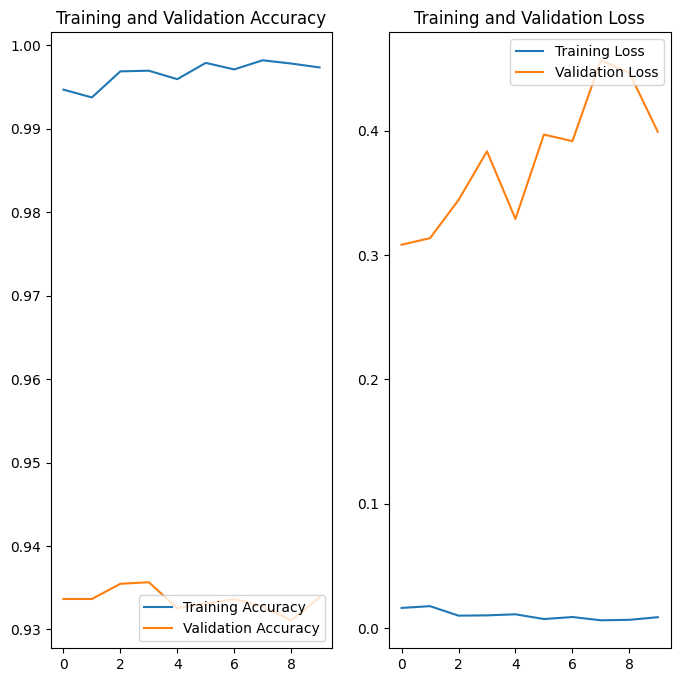

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("model_h1.h5")

In [ ]:
model.evaluate(X_lstm_test, Y_lstm_test)

172/172 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.9338


[0.399191677570343, 0.9338315725326538]

In [ ]:
# Function to plot the confusion matrix 
# (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)


from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

172/172 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[2874  233]
 [ 130 2249]]
0.9338315712723295


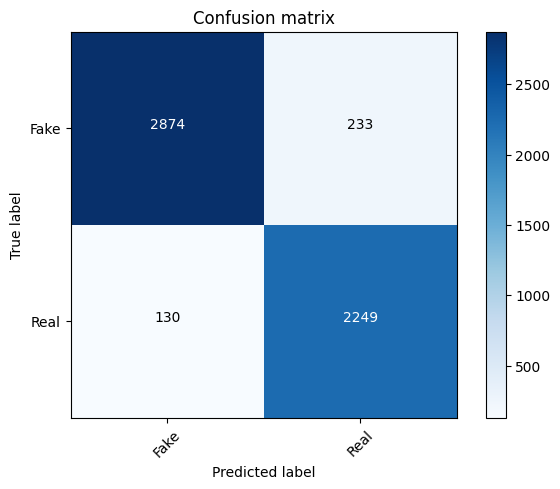

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

Y_lstm_predict = (model.predict(X_lstm_test) > 0.5).astype("int32");

c_matix = confusion_matrix(Y_lstm_test, Y_lstm_predict)
plot_confusion_matrix(c_matix, classes=['Fake', 'Real'])
accuracy = accuracy_score(Y_lstm_test, Y_lstm_predict)
print(c_matix)
print(accuracy)